In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astroplan import Observer, FixedTarget
import time

In [81]:
data=pd.read_csv("simulated_frb.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,Name,RA,Dec,Period,Duty_cycle,phase
0,sample_0,79.915322,38.917144,157.008117,0.157126,0.485992
1,sample_1,313.454923,25.879332,92.338738,0.331295,0.161846
2,sample_2,74.416829,-84.157788,124.004563,0.122134,0.415562
3,sample_3,330.690741,-87.386183,127.422633,0.115164,0.143796
4,sample_4,175.823144,1.548443,114.784066,0.414072,0.433331
...,...,...,...,...,...,...
995,sample_995,16.980657,-32.955839,11.646966,0.361954,0.093755
996,sample_996,239.653670,68.116875,61.108643,0.164639,0.240651
997,sample_997,313.047550,-1.751495,85.173223,0.269631,0.534387
998,sample_998,111.738639,4.712554,146.718034,0.401254,0.507714


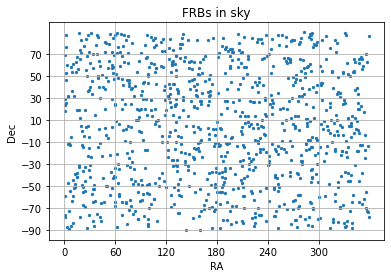

In [82]:
RA=data.RA
Dec=data.Dec

plt.scatter(RA,Dec,s=5, marker='o')
plt.title("FRBs in sky")
plt.xlabel('RA')
plt.xticks(range(0, 360,60))
plt.ylabel('Dec')
plt.yticks(range(-90, 90,20))
plt.grid()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_360\3816714450.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ra_fixed[ra_fixed > 180] = ra_fixed[ra_fixed > 180] - 360


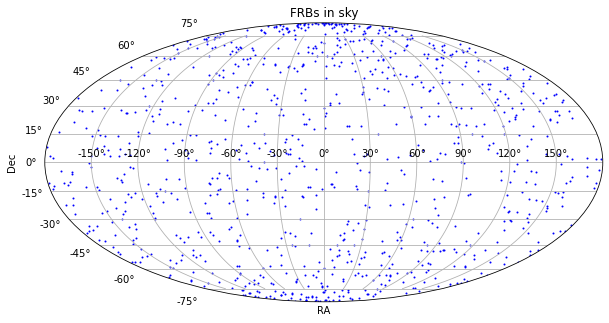

In [83]:
#Sky projection plot
RA_rad=[]
Dec_rad=[]

#converting RA range from 0 t0 360, to -180 to 180
ra_fixed = RA
ra_fixed[ra_fixed > 180] = ra_fixed[ra_fixed > 180] - 360

#degress into radians, required for projection
for i in range(len(RA)):
    RA_rad.append(np.deg2rad(RA[i]))
    Dec_rad.append(np.deg2rad(Dec[i]))

fig = plt.figure(figsize = (10,9))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(RA_rad, Dec_rad, s=1, marker='o', color='b')
ax.grid(True) 
plt.title('FRBs in sky')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_360\122003863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RA[RA < 0] = RA[RA < 0] + 360


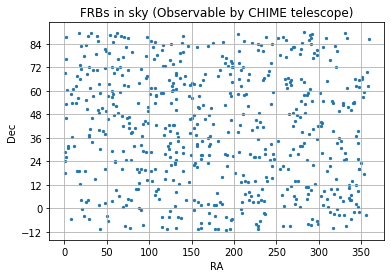

In [84]:
data.drop(data[data['Dec'] <= -11].index, inplace=True) #below declination −11 is outside the CHIME/FRB field of view
data=data.reset_index(drop=True)
RA=data.RA
Dec=data.Dec

#Fixing RA range (0 to 360)
RA[RA < 0] = RA[RA < 0] + 360

plt.scatter(RA, Dec, s=5)
plt.title("FRBs in sky (Observable by CHIME telescope)")
plt.xlabel('RA')
plt.xticks(range(0, 360, 50))
plt.ylabel('Dec')
plt.yticks(range(-12, 90, 12))
plt.grid()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_360\1331957837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RA[RA > 180] = RA[RA > 180] - 360


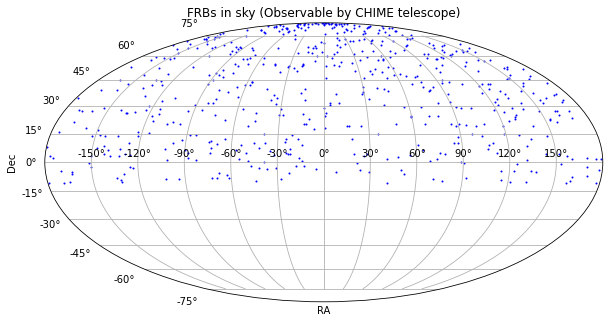

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_360\1331957837.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RA[RA < 0] = RA[RA < 0] + 360


In [85]:
#Sky projection
RA[RA > 180] = RA[RA > 180] - 360

RA_rad=[]
Dec_rad=[]
for i in range(len(RA)):
    RA_rad.append(np.deg2rad(RA[i]))
    Dec_rad.append(np.deg2rad(Dec[i]))

fig = plt.figure(figsize = (10,9))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(RA_rad, Dec_rad, s=1, marker='o', color='b')
ax.grid(True) 
plt.title('FRBs in sky (Observable by CHIME telescope)')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

RA[RA < 0] = RA[RA < 0] + 360

In [86]:
data

,Name,RA,Dec,Period,Duty_cycle,phase
0,sample_0,79.915322,38.917144,157.008117,0.157126,0.485992
1,sample_1,313.454923,25.879332,92.338738,0.331295,0.161846
2,sample_4,175.823144,1.548443,114.784066,0.414072,0.433331
3,sample_5,220.221673,6.191391,2.837210,0.175531,0.767642
4,sample_7,186.625291,84.941886,18.716900,0.466380,0.052901
...,...,...,...,...,...,...
584,sample_993,261.572560,86.094627,36.180989,0.327012,0.926708
585,sample_994,157.421051,51.962613,152.723199,0.462210,0.709177
586,sample_996,239.653670,68.116875,61.108643,0.164639,0.240651
587,sample_997,313.047550,-1.751495,85.173223,0.269631,0.534387


In [87]:
D=data.Duty_cycle
phs=data.phase #start phase
name=data.Name

def Active_frbs(phs,D):  #Takes phase and Duty cycle as input
    #To determizne Active FRBs
    Active_frb=[] 

    for i in range(len(phs)):
        if phs[i]<=0.5+0.5*D[i] and phs[i]>=0.5-0.5*D[i]:
            #print("Active")
            Active_frb.append(name[i])
        #else:
            #print("Inactive")

    print("Number of active FRBs in beginning= ", len(Active_frb)) #Active at start phase
    return Active_frb

Act_frbs=Active_frbs(phs,D)

Number of active FRBs in beginning=  160


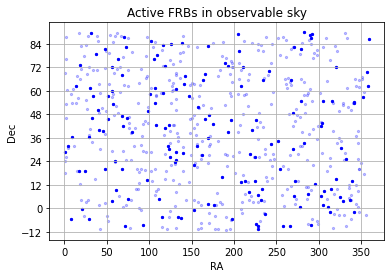

In [88]:
def plot_act_frbs(Active_frb):
    #RA and Dec of Active FRBs with start phase
    RA_act=[]
    Dec_act=[]

    for i in range(len(Active_frb)):
        temp=data.loc[data['Name']==Active_frb[i]]
        RA_act.append(temp.RA)
        Dec_act.append(temp.Dec)

    plt.scatter(RA_act, Dec_act, s=5, c='b')
    plt.scatter(RA, Dec, s=5, alpha=0.25, c='b')
    plt.title("Active FRBs in observable sky")
    plt.xlabel('RA')
    plt.xticks(range(0, 360, 50))
    plt.ylabel('Dec')
    plt.yticks(range(-12, 90, 12))
    plt.grid()
    plt.show()

plot_act_frbs(Act_frbs)

In [124]:
ref_epoch='1 Jan 2000 11:58:56' #epoch j2000, UTC time
R_epoch=time.strptime(ref_epoch, "%d %b %Y %H:%M:%S")
R=time.mktime(R_epoch) #Reference epoch in seconds
R

946708136.0

In [129]:
x=Time('2000-01-01T11:58:56')
x.format='jd'
x.value*24*60*60

3530224798.933333

In [125]:
date="1 Jun 2022 12:00:00" #Begining of observation
t=time.strptime(date, "%d %b %Y %H:%M:%S")
T=time.mktime(t) #Time in seconds

P=data.Period
new_phs=[]

for i in range(len(P)):
    #P[i]=P[i]*24*60*60
    P[i]*24*60*60
    new_phs.append(((T-R)%P[i])/P[i])

#new_phs

In [94]:
data

,Name,RA,Dec,Period,Duty_cycle,phase
0,sample_0,79.915322,38.917144,157.008117,0.157126,0.485992
1,sample_1,313.454923,25.879332,92.338738,0.331295,0.161846
2,sample_4,175.823144,1.548443,114.784066,0.414072,0.433331
3,sample_5,220.221673,6.191391,2.837210,0.175531,0.767642
4,sample_7,186.625291,84.941886,18.716900,0.466380,0.052901
...,...,...,...,...,...,...
584,sample_993,261.572560,86.094627,36.180989,0.327012,0.926708
585,sample_994,157.421051,51.962613,152.723199,0.462210,0.709177
586,sample_996,239.653670,68.116875,61.108643,0.164639,0.240651
587,sample_997,313.047550,-1.751495,85.173223,0.269631,0.534387


Number of active FRBs in beginning=  159


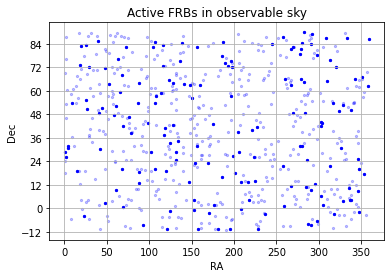

In [95]:
Act_frbs_T=Active_frbs(new_phs,D) #Acive FRBs at time T
plot_act_frbs(Act_frbs_T) #To plot active FRBs

In [158]:
chime = Observer.at_site("CHIME")
coord = SkyCoord(RA*u.deg, Dec*u.deg)
s = FixedTarget(coord=coord)
time = Time('2022-05-11 06:00:00')

rise_time = chime.target_rise_time(time, s)
#print(rise_time)
set_time = chime.target_set_time(time, s)
#print(set_time)
sky_motion=pd.DataFrame(list(zip(rise_time, set_time)), columns=['Rise_Time', 'Set_Time'])
sky_motion.drop(sky_motion[sky_motion['Rise_Time'] == '--'].index, inplace=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 296 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [159]:
sky_motion

,Rise_Time,Set_Time
0,2459710.9738273793,2459710.86355888
1,2459710.72175592,2459710.4142930154
2,2459710.431616108,2459710.939439385
3,2459710.5394097497,2459711.0775940088
4,--,--
...,...,...
584,--,--
585,--,--
586,--,--
587,2459710.8217346375,2459710.3123288536
